In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

# Created by Diana Janik and Jan Markiewicz

In [2]:
import torch 
import torchvision


## Zadanie 1

Wytrenuj sieć na danych  z pliku `reg_data_noise.npy`. 

In [3]:
data = np.load('reg_data_noise.npy')

In [4]:
xs = data[:,0]
ys = data[:,1]

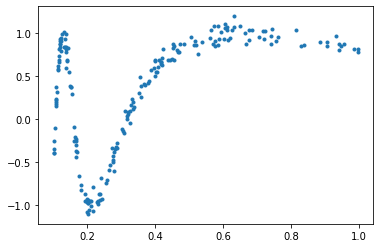

In [5]:
plt.plot(xs,ys,'.');

In [6]:
model = torch.nn.Sequential(torch.nn.Linear(1,8),
                    torch.nn.ReLU6(), 
                    torch.nn.Linear(8,64),
                    torch.nn.Dropout(0.2), 
                    torch.nn.ReLU(),
                    torch.nn.Linear(64,8),
                    torch.nn.ReLU(),
                    torch.nn.Linear(8,1))

In [7]:
# bit worst
# model = torch.nn.Sequential(torch.nn.Linear(1,5),
#                             torch.nn.ReLU(),
#                             torch.nn.Dropout(0.2),
#                             torch.nn.Linear(5,25),
#                             torch.nn.ReLU(),
#                             torch.nn.Dropout(0.4),
#                             torch.nn.Linear(25,5),
#                             torch.nn.ReLU(
#                             torch.nn.Linear(5,1))


In [8]:
t_xs = torch.from_numpy(xs).view(-1,1)
t_ys = torch.from_numpy(ys).view(-1,1)

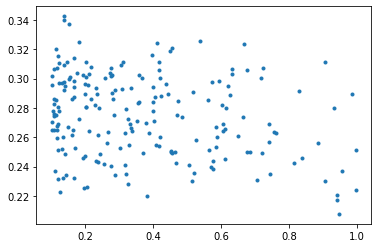

In [9]:
t_out = model(t_xs)

plt.plot(xs, t_out.data.view(-1).numpy(),'.')

In [10]:
dataset = torch.utils.data.TensorDataset(t_xs, t_ys)
(train_set, valid_set) = torch.utils.data.random_split(dataset,(160,40))

In [11]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=len(train_set))

In [12]:
optimizer = torch.optim.SGD(model.parameters(),lr =0.001)

In [13]:
loss_func = torch.nn.MSELoss()

In [14]:
%%time
err_train=[]
err_valid=[]
for epoch in range(10000):    
    for datum in train_loader:
        optimizer.zero_grad()
        (features,target) = datum
        pred = model(features)
        loss = loss_func(pred, target)
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        vpred  = model(valid_set[:][0])
        vloss  = loss_func(vpred,valid_set[:][1])
        err_valid.append(vloss)
        pred  = model(train_set[:][0])
        loss  = loss_func(pred,train_set[:][1])
        err_train.append(loss)
    if epoch%1000 == 0:
        print("epoch %d %f %f " % (epoch, loss, vloss))   

epoch 0 0.491117 0.348445 
epoch 1000 0.475891 0.330114 
epoch 2000 0.454835 0.309449 
epoch 3000 0.435333 0.296304 
epoch 4000 0.407932 0.279922 
epoch 5000 0.381824 0.246096 
epoch 6000 0.354133 0.231286 
epoch 7000 0.318432 0.220630 
epoch 8000 0.309223 0.193059 
epoch 9000 0.301651 0.190176 
CPU times: user 1min 9s, sys: 459 ms, total: 1min 10s
Wall time: 27.1 s


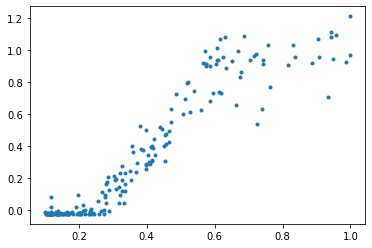

In [15]:
t_out = model(t_xs)

plt.plot(xs, t_out.data.view(-1).numpy(),'.')

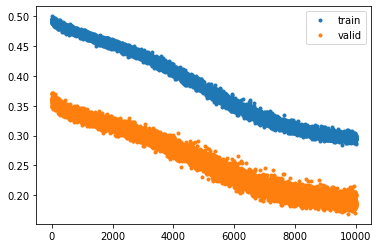

In [16]:
plt.plot(err_train, '.', label='train')
plt.plot(err_valid, '.', label='valid');
plt.legend()

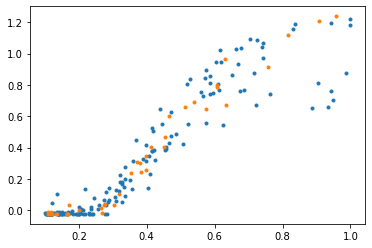

In [17]:
t_out_train = model(train_set[:][0])
plt.plot(train_set[:][0].data.numpy(), t_out_train.data.view(-1).numpy(),'.')
t_out_valid = model(valid_set[:][0])
plt.plot(valid_set[:][0].data.numpy(), t_out_valid.data.view(-1).numpy(),'.')

In [18]:
torch.save(model, "model.pt")

/home/jan/studia/datascience/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/jan/studia/datascience/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/jan/studia/datascience/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU6. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/jan/studia/datascience/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Dropout. It won't be checked for correctness upon loading.
  "type 